Found 633 images belonging to 2 classes.
Found 158 images belonging to 2 classes.


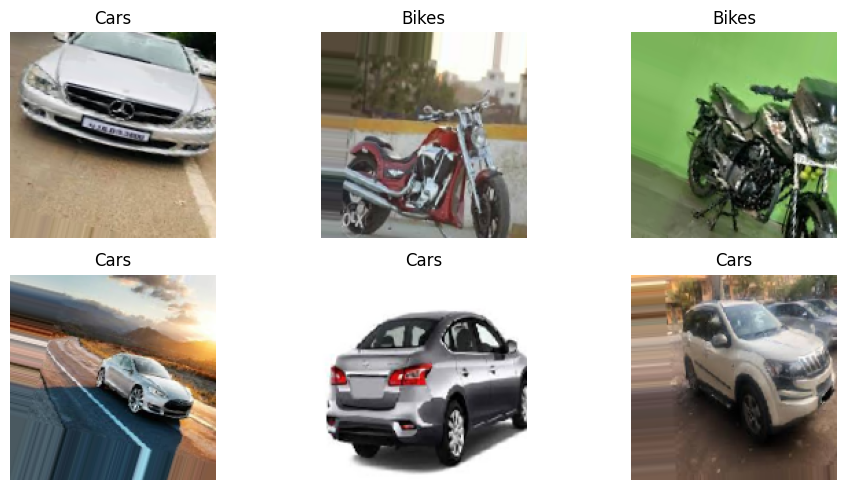

In [5]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set image dimensions and batch size
img_height = 150
img_width = 150
batch_size = 32

# Define the path to the dataset (should contain 'Bikes/' and 'Cars/' subfolders)
dataset_path = 'images/train'

# Create an ImageDataGenerator with normalization and augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Split 80% for training, 20% for validation
)

# Create the training set (80% of the data)
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True
)

# Create the validation set (20% of the data)
val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

# Load one batch of images and labels for preview
images, labels = next(train_generator)

# Get the class names (e.g., ['Bikes', 'Cars'])
class_names = list(train_generator.class_indices.keys())

# Plot a few sample images with their labels
plt.figure(figsize=(10, 5))
for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(images[i])
    label = class_names[int(labels[i])]
    plt.title(label)
    plt.axis("off")
plt.tight_layout()
plt.show()


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Initialize the Sequential model
model = Sequential()

# --- Block 1 ---
# First convolutional layer to extract low-level features
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))

# Normalize activations to stabilize learning
model.add(BatchNormalization())

# Downsample feature maps to reduce spatial dimensions
model.add(MaxPooling2D(pool_size=(2, 2)))

# --- Block 2 ---
# Second convolutional layer to learn more complex patterns
model.add(Conv2D(64, (3, 3), activation='relu'))

# Batch normalization for improved training stability
model.add(BatchNormalization())

# Max pooling again to reduce spatial size
model.add(MaxPooling2D(pool_size=(2, 2)))

# --- Block 3 ---
# Third convolutional layer to learn high-level features
model.add(Conv2D(128, (3, 3), activation='relu'))

# Batch normalization after the third convolution
model.add(BatchNormalization())

# Third pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# --- Fully Connected Layers ---
# Flatten 2D feature maps into a 1D vector
model.add(Flatten())

# Dense layer to learn complex feature combinations
model.add(Dense(128, activation='relu'))

# Dropout to reduce overfitting during training
model.add(Dropout(0.5))

# Output layer for binary classification with sigmoid activation
model.add(Dense(1, activation='sigmoid'))

# Compile the model with appropriate loss function and optimizer
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Display the model architecture summary
model.summary()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,377 (18.42 MB)

 Trainable params: 4,828,929 (18.42 MB)

 Non-trainable params: 448 (1.75 KB)

In [7]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt


# Set the number of training epochs
epochs = 20

# Set the initial learning rate
learning_rate = 0.001

# Set the batch size (already applied in train_generator)
batch_size = 32

# Stop training early if validation loss doesn't improve after a few epochs
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Save the best model weights based on highest validation accuracy
model_checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_accuracy',
    save_best_only=True
)

# Reduce the learning rate if validation loss plateaus
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    verbose=1,
    min_lr=1e-6
)

# Train the model using the training and validation data
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=[early_stop, model_checkpoint, reduce_lr]
)

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 969ms/step - accuracy: 0.6598 - loss: 3.3237

20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.6608 - loss: 3.3100 - val_accuracy: 0.5063 - val_loss: 2.2306 - learning_rate: 0.0010
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.7344 - loss: 2.3342 - val_accuracy: 0.5063 - val_loss: 7.9145 - learning_rate: 0.0010
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7448 - loss: 0.7704
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.7443 - loss: 0.7701 - val_accuracy: 0.5063 - val_loss: 7.8567 - learning_rate: 0.0010
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7523 - loss: 0.7368 - val_accuracy: 0.5063 - val_loss: 4.9141 - learning_rate: 5.0000e-04


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 366ms/step
Classification Report:

              precision    recall  f1-score   support

       Bikes       0.00      0.00      0.00        78
        Cars       0.51      1.00      0.67        80

    accuracy                           0.51       158
   macro avg       0.25      0.50      0.34       158
weighted avg       0.26      0.51      0.34       158

Confusion Matrix:

[[ 0 78]
 [ 0 80]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

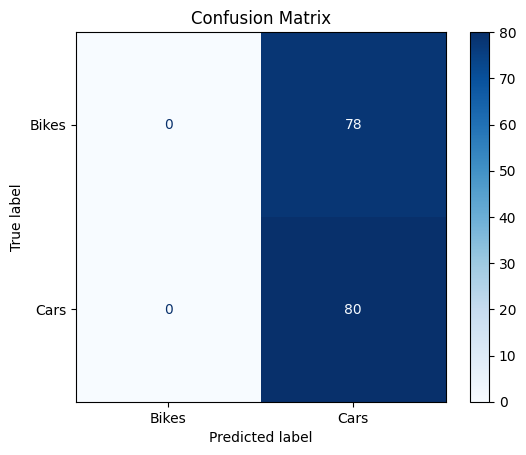

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load the best saved model from training
model = load_model('best_model.h5')

# Run model predictions on the validation set
pred_probs = model.predict(val_generator)

# Convert predicted probabilities to binary class labels (0 or 1)
pred_labels = (pred_probs > 0.5).astype(int).flatten()

# Get the true class labels from the validation generator
true_labels = val_generator.classes

# Get the class names in order
class_names = list(val_generator.class_indices.keys())

# Print the full classification report: Precision, Recall, F1-Score, Accuracy
print("Classification Report:\n")
print(classification_report(true_labels, pred_labels, target_names=class_names))

# Print the confusion matrix
print("Confusion Matrix:\n")
conf_matrix = confusion_matrix(true_labels, pred_labels)
print(conf_matrix)

# Plot the confusion matrix for better visualization
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


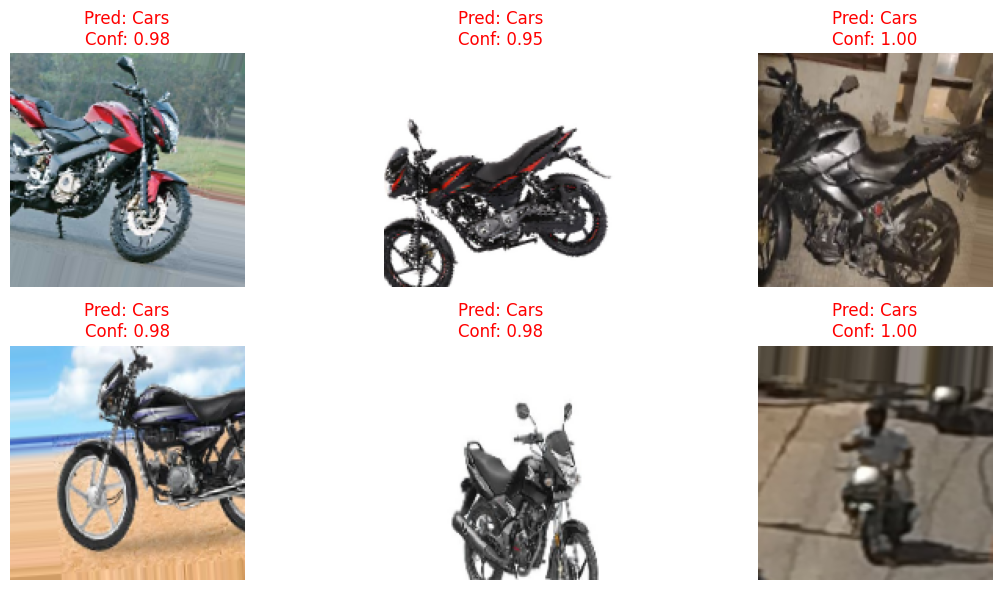

4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 589ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x14ee2d620> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 587ms/step
Classification Report:

              precision    recall  f1-score   support

       Bikes       0.00      0.00      0.00        78
        Cars       0.51      1.00      0.67        80

    accuracy                           0.51       158
   macro avg       0.25      0.50      0.34       158
weighted avg       0.26      0.51      0.34       158

Confusion Matrix:

[[ 0 78]
 [ 0 80]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

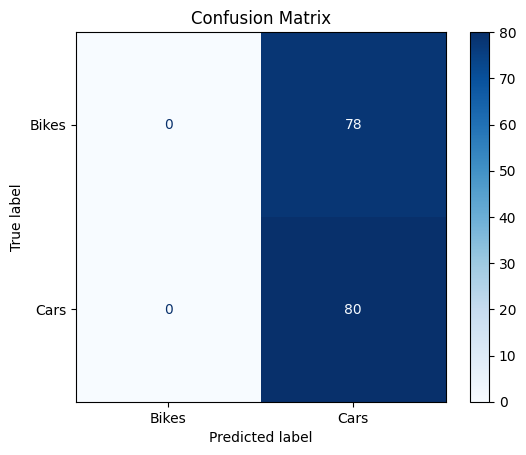

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load the best saved model
model = load_model('best_model.h5')

# Get a batch of validation images and labels
val_images, val_labels = next(val_generator)

# Run predictions on the batch
pred_probs = model.predict(val_images)

# Convert probabilities to binary class predictions
pred_labels = (pred_probs > 0.5).astype(int).flatten()

# Get the class names from the generator
class_names = list(val_generator.class_indices.keys())

# Set the number of sample images to display
num_images = 6

# Create a plot to show sample predictions
plt.figure(figsize=(12, 6))

# Loop through the first few images in the batch
for i in range(num_images):
    # Create a subplot for each image
    plt.subplot(2, 3, i + 1)

    # Display the image
    plt.imshow(val_images[i])
    plt.axis('off')

    # Get true and predicted class names
    true_class = class_names[int(val_labels[i])]
    predicted_class = class_names[int(pred_labels[i])]

    # Get the prediction confidence
    confidence = pred_probs[i][0]

    # Set title color: green if correct, red if incorrect
    color = 'green' if true_class == predicted_class else 'red'

    # Display predicted class and confidence in the title
    plt.title(f"Pred: {predicted_class}\nConf: {confidence:.2f}", color=color)

# Adjust spacing and display the plot
plt.tight_layout()
plt.show()

# Predict on the entire validation set
val_generator.reset()
all_probs = model.predict(val_generator, verbose=1)
all_preds = (all_probs > 0.5).astype(int).flatten()
true_labels = val_generator.classes

# Generate a classification report
report = classification_report(true_labels, all_preds, target_names=class_names)

# Print the report to console
print("Classification Report:\n")
print(report)

# Save the report to a text file
with open("classification_report.txt", "w") as f:
    f.write(report)

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(true_labels, all_preds)
print("Confusion Matrix:\n")
print(conf_matrix)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# Save the model architecture summary to a text file
with open("model_summary.txt", "w") as f:
    model.summary(print_fn=lambda x: f.write(x + "\n"))

